### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [27]:
library(ggplot2)
library(lubridate)

In [28]:
#Read in the data sets, and set any blank cell to NA
ny = read.csv('new_york_city.csv', na.strings=c("","NA"))
wash = read.csv('washington.csv', na.strings=c("", "NA"))
chi = read.csv('chicago.csv', na.strings=c("","NA"))

In [29]:
head(ny)
nrow(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


[1] 54770

In [30]:
head(wash)
nrow(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


[1] 89051

In [31]:
head(chi)
nrow(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


[1] 8630

I want to combine all of the data sets in order to make my analyses. The Washington data set will need to have two columns added with the values set to NA for the missing Gender and Birth.Year columns that the other two data sets contain. In addition, a column will need to be added to each data set indicating the original dataset it came from (i.e. the city).

In [32]:
wash$Gender<-NA
wash$Birth.Year<-NA
wash$City<-'Washington'
ny$City<-'New York'
chi$City<-'Chicago'

In [33]:
head(wash)
head(chi)
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,Chicago


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [34]:
#Concat the data sets
bikeshare<-rbind(chi,wash)
bikeshare<-rbind(bikeshare,ny)
head(bikeshare)
nrow(bikeshare)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,Chicago


[1] 152451

In [35]:
#Convert trip duration from seconds to minutes for easier
#reading and comporehension of scale
bikeshare$Trip.Duration<-(bikeshare$Trip.Duration/60)
ny$Trip.Duration<-(ny$Trip.Duration/60)
chi$Trip.Duration<-(chi$Trip.Duration/60)
wash$Trip.Duration<-(wash$Trip.Duration/60)

In [36]:
#Confirming trip duration has been converted properly
head(bikeshare)
head(ny)
head(chi)
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,5.350000,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,26.833333,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,6.933333,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,5.833333,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,8.900000,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,9.766667,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,Chicago


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,13.250000,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,11.533333,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,22.083333,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,11.716667,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,5.483333,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,16.633333,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,5.350000,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,26.833333,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,6.933333,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,5.833333,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,8.900000,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,9.766667,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,Chicago


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,8.151100,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,6.709150,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,10.620850,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,30.455683,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,25.823783,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,6.633333,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington


### Question 1


**How do the trip durations differ between users that are subscribers and users that are customers?**

**How do trip durations differ between markets?**

Warning message:
“Removed 4177 rows containing non-finite values (stat_bin).”Warning message:
“Removed 12 rows containing missing values (geom_bar).”

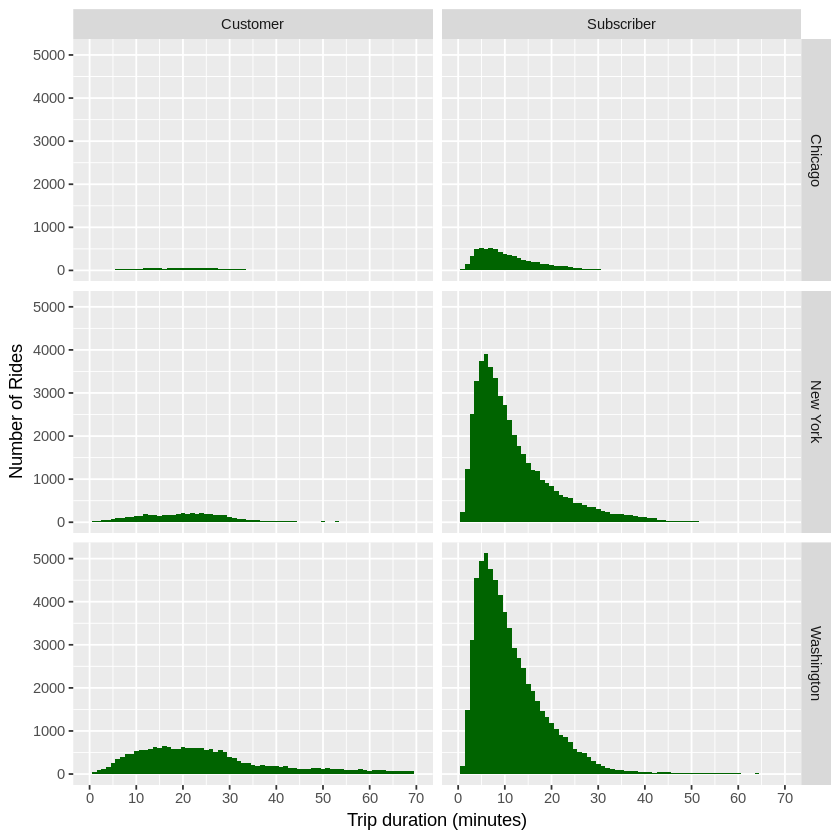

In [37]:
ggplot(aes (x = Trip.Duration), data = subset(bikeshare, !is.na(User.Type))) +
    geom_histogram(binwidth = 1, fill='darkgreen') +
    scale_x_continuous(limits = c(0, 70), breaks = seq(0, 70, 10)) +
    facet_grid(City~User.Type) +
    xlab('Trip duration (minutes)') +
    ylab('Number of Rides') 

In [38]:
by(bikeshare$Trip.Duration, bikeshare$User.Type, summary)

bikeshare$User.Type: Customer
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.022    15.257    24.167    41.911    40.076 18143.900 
------------------------------------------------------------ 
bikeshare$User.Type: Subscriber
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    5.869    9.459   12.325   15.245 2833.882 

In [39]:
by(bikeshare$Trip.Duration, bikeshare$City, summary)

bikeshare$City: Chicago
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    6.571   11.167   15.620   18.650 1423.467 
------------------------------------------------------------ 
bikeshare$City: New York
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.017     6.133    10.167    15.060    17.517 18143.900         1 
------------------------------------------------------------ 
bikeshare$City: Washington
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.005     6.848    11.783    20.566    20.554 15076.523         1 

**How do the trip durations differ between users that are subscribers and users that are customers?**

- Very clearly, subscriber rides are more likely to be shorter amounts of time (median of 9.46 minutes, mean of 12.33 minutes) compared to customer rides (median of 24.17 minutes, mean of 41.91 minutes). 

**How do trip durations differ between markets?**

- Assessing the histograms, the shapes and skews of each market are very similar- the customer histogram is much shallower in every case vs. the subscriber histogram. All three markets are skewed right, with shorter rides being much more common. Comparing the summary statistics, this is also supported with each markets' 1st quartile landing in the 6 minute time frame, and the median between 10-11 minutes. From there, the Washington market appears to start differing, with the 3rd quartile shifting all the way to ~20 minutes, which could be impacted by more rides in general being taken in the Washington market, or perhaps the bike-friendliness of this market. 

### Question 2

**What time of year is most popular for rides? When is the least popular?**

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

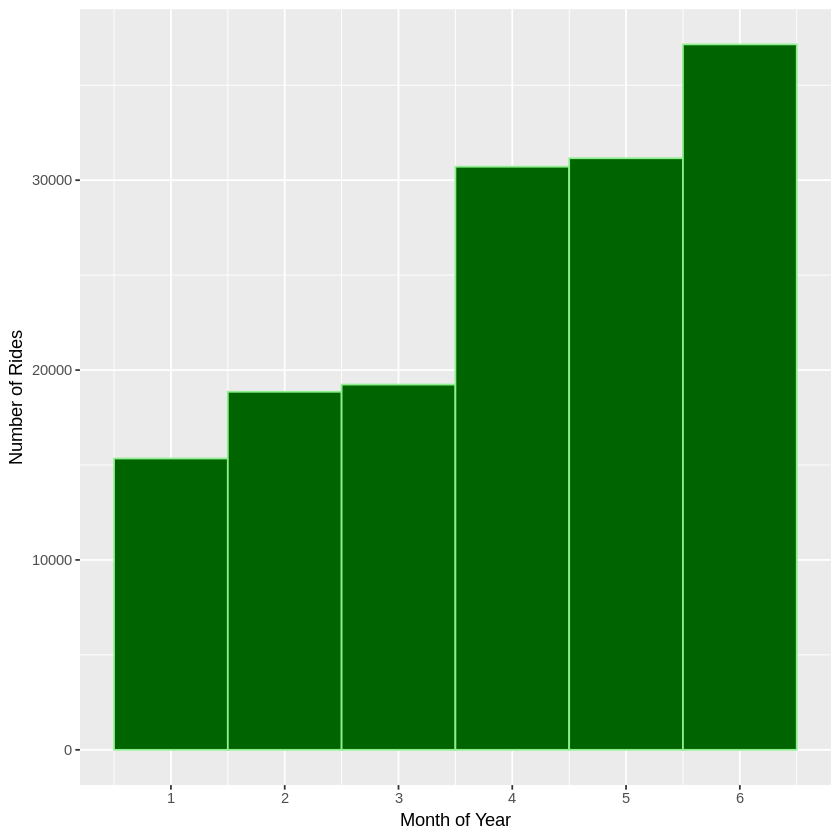

In [40]:
ggplot(aes (x = month(bikeshare$Start.Time)), data = bikeshare) +
    geom_histogram(binwidth=1, color='lightgreen', fill='darkgreen') + 
    scale_x_continuous(breaks = 1:6) +
    xlab('Month of Year') +
    ylab('Number of Rides')

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

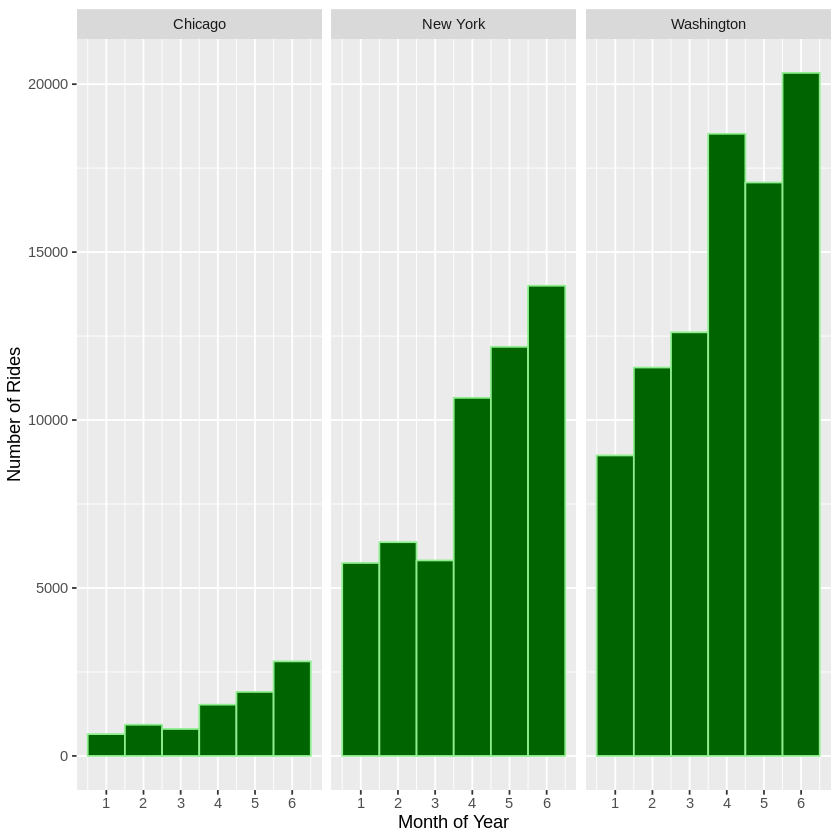

In [41]:
ggplot(aes (x = month(bikeshare$Start.Time)), data = bikeshare) +
    geom_histogram(binwidth=1, color='lightgreen', fill='darkgreen') + 
    facet_wrap(~City) +
    scale_x_continuous(breaks = 1:6) +
    xlab('Month of Year') +
    ylab('Number of Rides')

**What time of year is most popular for rides? When is the least popular?**

- Predictably, the winter months are the least popular time of year to ride, while spring is most popular, given the provided dataset. Since each of these cities are located in the United States Northeast, the weather in the winter can be non-ideal for commuting by bicycle. We might make the assumption that if the bikeshare extends to cities located more in the US South, this may reduce or eliminate the winter slow-down in rides.

### Question 3

**What hour of the day are the shortest rides most typical? Longest rides?**

Warning message:
“Removed 118 rows containing non-finite values (stat_summary).”Warning message:
“Removed 118 rows containing non-finite values (stat_summary).”Warning message:
“Removed 118 rows containing missing values (geom_point).”

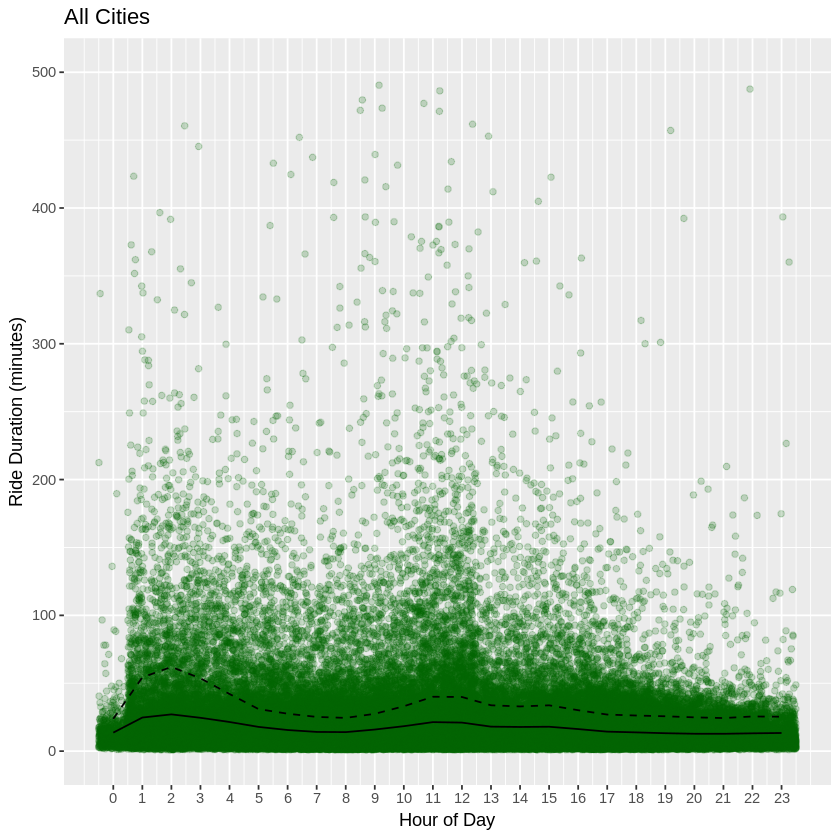

In [42]:
ggplot(aes(x = hour(bikeshare$Start.Time), y = bikeshare$Trip.Duration), data=bikeshare) +
    geom_point(alpha = 0.2, 
               position=position_jitter(w=0.5), 
               color='darkgreen') +
    ylim(0,500)+
    scale_x_continuous(breaks=0:23)+
    geom_line(stat='summary',fun.y=mean)+
    geom_line(stat='summary',
              fun.y=quantile,
              fun.args=list(probs=0.9),
              linetype=2)+
    xlab('Hour of Day')+
    ylab('Ride Duration (minutes)')+
    ggtitle('All Cities')

Warning message:
“Removed 81 rows containing non-finite values (stat_summary).”Warning message:
“Removed 81 rows containing non-finite values (stat_summary).”Warning message:
“Removed 81 rows containing missing values (geom_point).”

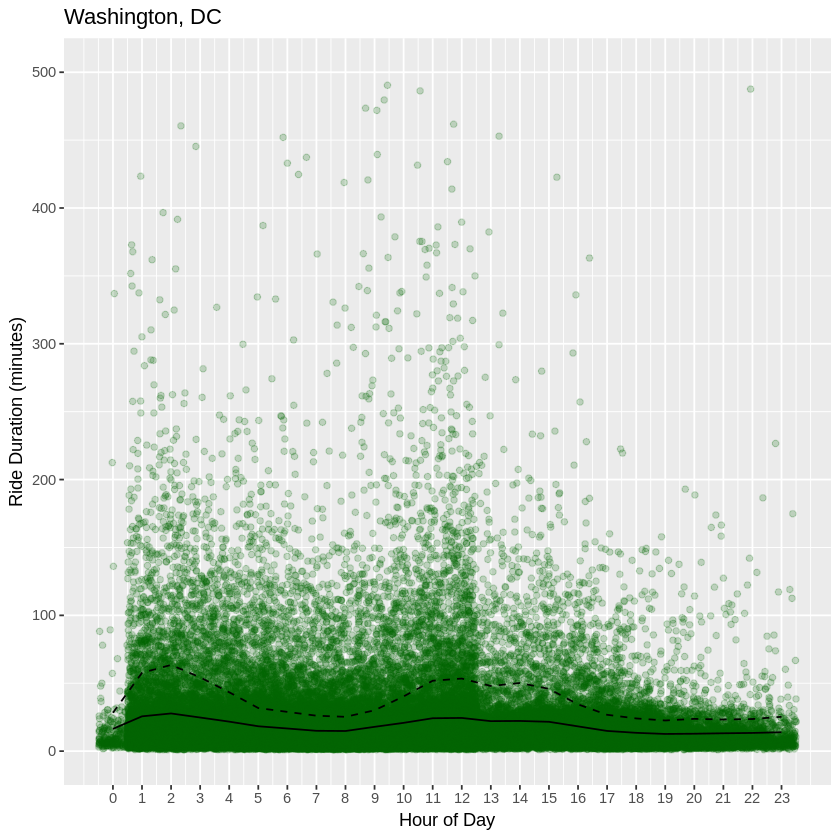

In [43]:
ggplot(aes(x = hour(wash$Start.Time), y = wash$Trip.Duration), data=wash) +
    geom_point(alpha = 0.2, 
               position=position_jitter(w=0.5), 
               color='darkgreen') +
    ylim(0,500)+
    scale_x_continuous(breaks=0:23)+
    geom_line(stat='summary',fun.y=mean)+
    geom_line(stat='summary',
              fun.y=quantile,
              fun.args=list(probs=0.9),
              linetype=2)+
    xlab('Hour of Day')+
    ylab('Ride Duration (minutes)')+
    ggtitle('Washington, DC')

Warning message:
“Removed 86 rows containing non-finite values (stat_summary).”Warning message:
“Removed 86 rows containing non-finite values (stat_summary).”Warning message:
“Removed 86 rows containing missing values (geom_point).”

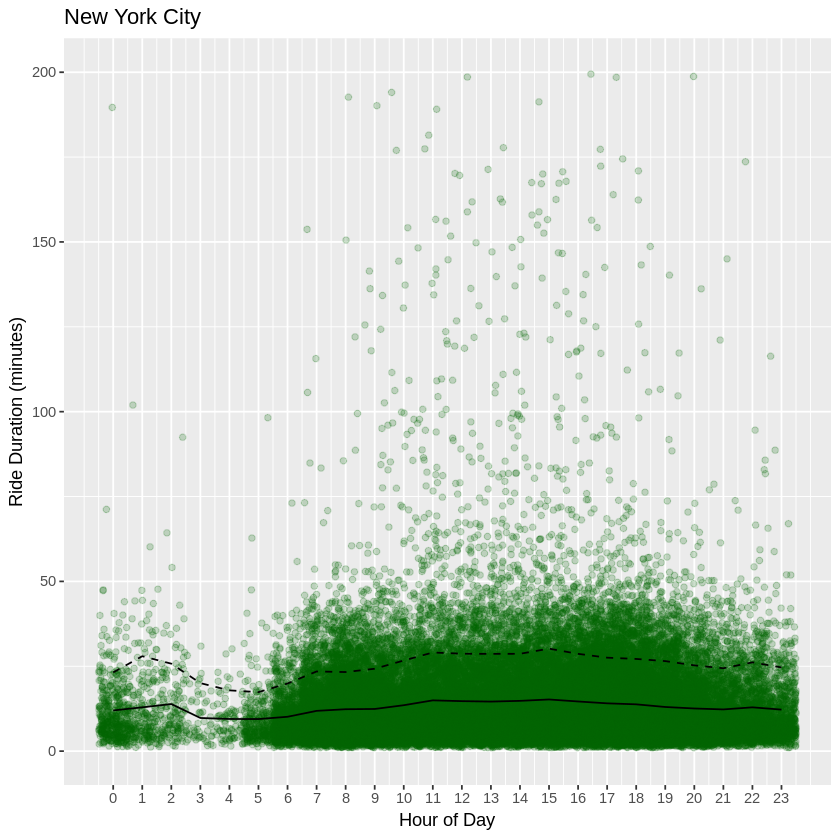

In [44]:
ggplot(aes(x = hour(ny$Start.Time), y = ny$Trip.Duration), data=ny) +
    geom_point(alpha = 0.2, 
               position=position_jitter(w=0.5), 
               color='darkgreen') +
    ylim(0,200)+
    scale_x_continuous(breaks=0:23)+
    geom_line(stat='summary',fun.y=mean)+
    geom_line(stat='summary',
              fun.y=quantile,
              fun.args=list(probs=0.9),
              linetype=2)+
    xlab('Hour of Day')+
    ylab('Ride Duration (minutes)')+
    ggtitle('New York City')

Warning message:
“Removed 17 rows containing non-finite values (stat_summary).”Warning message:
“Removed 17 rows containing non-finite values (stat_summary).”Warning message:
“Removed 17 rows containing missing values (geom_point).”

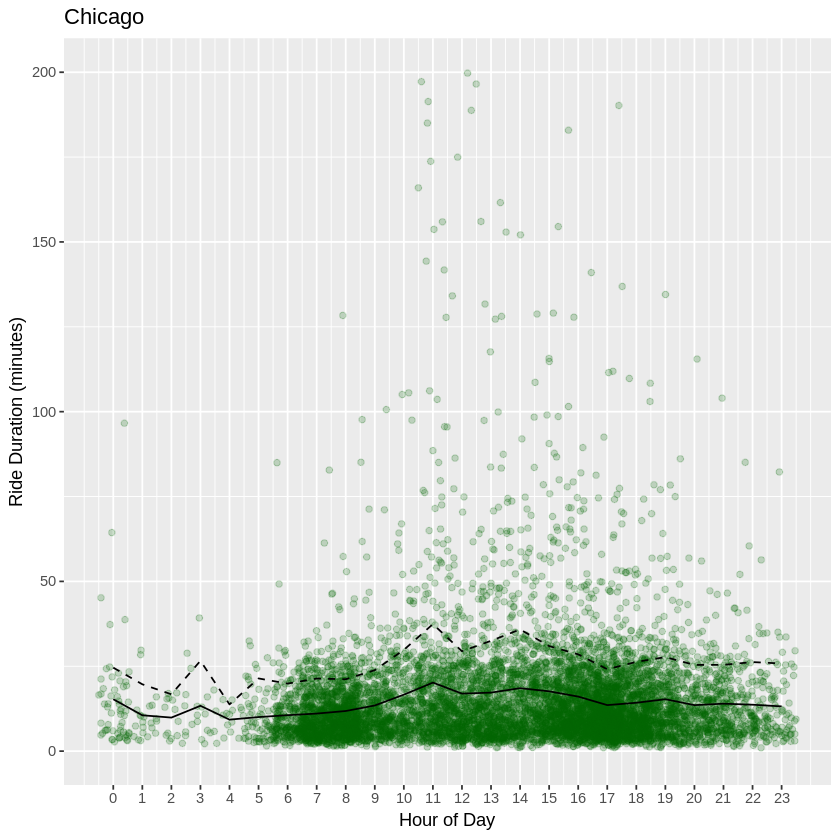

In [45]:
ggplot(aes(x = hour(chi$Start.Time), y = chi$Trip.Duration), data=chi) +
    geom_point(alpha = 0.2, 
               position=position_jitter(w=0.5), 
               color='darkgreen') +
    ylim(0,200)+
    scale_x_continuous(breaks=0:23)+
    geom_line(stat='summary',fun.y=mean)+
    geom_line(stat='summary',
              fun.y=quantile,
              fun.args=list(probs=0.9),
              linetype=2)+
    xlab('Hour of Day')+
    ylab('Ride Duration (minutes)')+
    ggtitle('Chicago')

**What hour of the day are the shortest rides most typical? Longest rides?**

- When analyzing the combined data set, the highest peak of mean ride duration occurred at the 2am hour. This was a little bit unexpected, so each of the markets' data sets were analyzed separately to perhaps get a better idea of what was happening. The shortest mean rides appear to occur around midnight to 1am, overall, as well as around 8am. Perhaps there are a greater number of commuting rides around 8am that are a shorter duration that brings this mean lower.
- Washington, DC, the market with the greatest number of rides overall, heavily influenced the mean ride duration peak at 2am- in Washington, DC, the greatest number of long-duration rides take place at 2am, and secondly between 11am and noon. Some inference could be made about the habits of the bikeshare users in the middle of the night- perhaps all bars and restaurants must close at 2am. It would be interesting to make another analysis faceted by day of the week, with this in mind.
- New York City, on the other hand, has a very stable ride duration throughout most of the day, until a dip between 2 and 5am. 
- Lastly, Chicago's longest rides occur around the 11am hour, perhaps riders are biking to lunch spots. Again, analyzing this by day of week would be very interesting with this in mind.

### Resources
"Make Dealing with Dates a Little Easier - lubridate": 
https://lubridate.tidyverse.org/

"Change the Blank Cells to "NA"": 
https://stackoverflow.com/questions/24172111/change-the-blank-cells-to-na



## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')